# Plotting data with pandas

pandas has built-in methods that simplify the creation of data visualization from DataFrames and Series objetcs.
This part of the course covers the main pandas possibilities for plotting data.

Before start coding, let's import the pandas library as usual, and the numpy, for some numerical processing we may need:

In [2]:
import pandas as pd
import numpy as np

And, finally, in order to better visualize the plots in this notebook, we execute the following line:

In [3]:
%matplotlib inline

## Line plots

All DataFrame and Series objects are equipped with the *plot* method, which builds some basic plots.
The default is line plots. Check how we can create a line plot from a Series object:

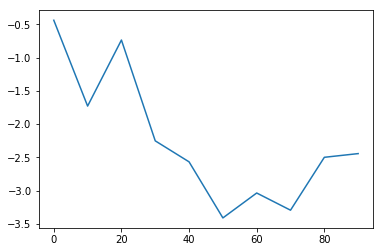

In [4]:
# Create a Series object
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
# Call its plot method
s.plot()

Notice that the index of the Series object was used on the x-axis. We can disable this feature by passing *use_index=False* to the *plot* method. Other configuration parameters are:
- xticks
- xlim
- yticks
- ylim
- ax

We can also use DataFrames for the same purpose. In this case, each column will produce a line plot on the same
subplot, and a legend will be automatically created:

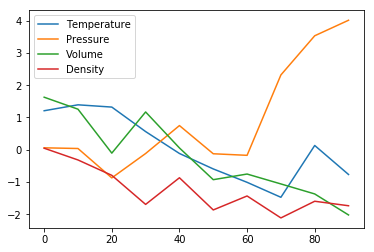

In [5]:
# Create a DataFrame object
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                 columns=['Temperature','Pressure','Volume','Density'],
                 index=np.arange(0,100,10))
# Call its plot method
df.plot()

## Bar plots

For Series and DataFrames, *plot* can also be seen as an attribute with a family of methods, each of them representing
a kind of plot. For example, the same effects of the previous call to the *plot* method could be achieved by
calling *plot.line()*. Following this model, bar plots can be produced by calling *plot.bar()* (vertical bars) or
*plot.barh()* (horizontal bars):

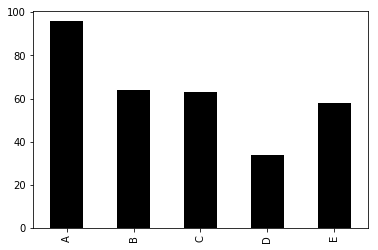

In [6]:
# Create a Series object
s = pd.Series(np.random.randint(30,100,5), index=['A','B','C','D','E'])
# Plot vertical bars, respectively, using its plot attribute
s.plot.bar(color='k')

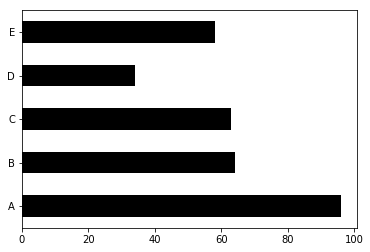

In [7]:
# Plot horizontal bars
s.plot.barh(color='k')

Plotting bars from DataFrames produces groups of bars for each row. Each bar in a group 
represents a column (or a cell) in the corresponding row:

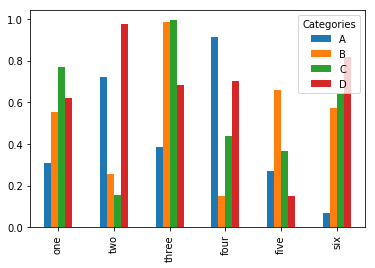

In [8]:
# Create a DataFrame
df = pd.DataFrame(np.random.rand(6,4),
                 index=['one','two','three','four','five','six'],
                 columns=pd.Index(['A','B','C','D'],name='Categories'))
# Plot using in plot attribute
df.plot.bar()

We can avoid the creation of such groups by passing the *stacked=True* argument:

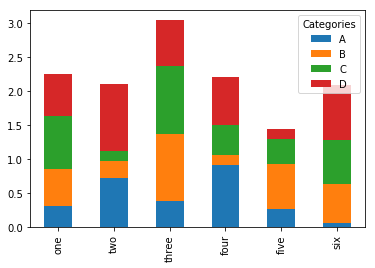

In [9]:
df.plot.bar(stacked=True)

## Pie plots

Generating a pie plot with pandas is just about using the *plot.pie()* method:

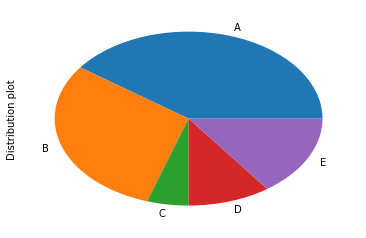

In [10]:
# Create a Series object
s = pd.Series([40,30,5,10,15], index=['A','B','C','D','E'], name='Distribution plot')
# Create the pie plot
s.plot.pie()

## Box plots

Given a sequence of values in a Series object, the box plot can be generated using the *plot.box()* method:

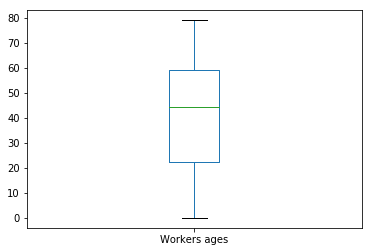

In [11]:
# Generating a sequence of values in a Series object
s = pd.Series(np.random.randint(0, 80, size=100), name="Workers ages")
# Create the box plot
s.plot.box()

## Area plots

Area plots are useful to compare two or more variables whose values change over some fixed interval. We 
can use DataFrames to represent such variables and, then, produce the area plot:

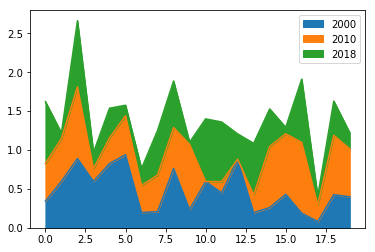

In [26]:
# Create the DataFrame
df = pd.DataFrame(np.random.rand(20,3), columns=['2000','2010','2018'])
# Generate the area graph
df.plot.area()

## Scatter plots

Scatter plots allows to visualize the distribution of a set of points in a plane:

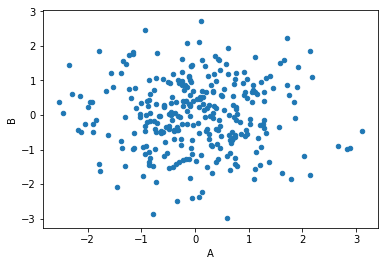

In [49]:
# Produce the set of points
df = pd.DataFrame(np.random.randn(300, 2), columns=['A','B'])
# Create a scatter plot
df.plot.scatter(x='A', y='B')

We can also create groups of points, using one color for each one:

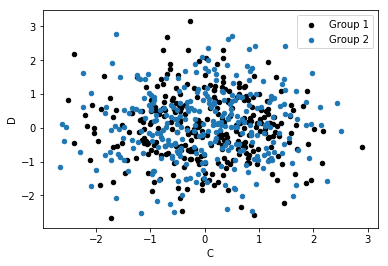

In [50]:
# Produce the set of points
df = pd.DataFrame(np.random.randn(300, 4), columns=['A','B','C','D'])
# Keep the first plot
ax = df.plot.scatter(x='A', y='B', label='Group 1', color='k')
# Use the previous plot to plot the other group
df.plot.scatter(x='C', y='D', label='Group 2', ax = ax)

## Histograms and density plots